In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
filepath = 'FEB 2023 BELGAUM.csv'
data = pd.read_csv(filepath)
data.head()

,YEAR,Date,Temperature,Min_Temperature,Max_Temperature,Humidity,Precipitation,Surface_Pressure,Wind_speed
0,2023,1,22.97,17.74,29.54,12.57,0.59,93.84,2.70
1,2023,2,22.93,18.05,30.39,11.17,0.04,93.88,3.28
2,2023,3,22.11,15.26,30.74,9.70,0.00,93.92,2.64
3,2023,4,23.06,15.05,32.08,9.77,0.00,93.81,2.11
4,2023,5,23.99,16.92,33.01,10.62,0.00,93.75,1.93


In [ ]:
data.shape


(28, 9)

In [ ]:
data.drop(['Surface_Pressure'], axis = 1, inplace = True)
data.head()

,YEAR,Date,Temperature,Min_Temperature,Max_Temperature,Humidity,Precipitation,Wind_speed
0,2023,1,22.97,17.74,29.54,12.57,0.59,2.70
1,2023,2,22.93,18.05,30.39,11.17,0.04,3.28
2,2023,3,22.11,15.26,30.74,9.70,0.00,2.64
3,2023,4,23.06,15.05,32.08,9.77,0.00,2.11
4,2023,5,23.99,16.92,33.01,10.62,0.00,1.93


In [ ]:
# missing columns 
data.isna().sum()

YEAR               0
Date               0
Temperature        0
Min_Temperature    0
Max_Temperature    0
Humidity           0
Precipitation      0
Wind_speed         0
dtype: int64

In [ ]:
data.describe()

,YEAR,Date,Temperature,Min_Temperature,Max_Temperature,Humidity,Precipitation,Wind_speed
count,28.0,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,2023.0,14.500000,24.446786,16.059286,34.442500,7.566071,0.022500,2.211071
std,0.0,8.225975,1.215941,1.045895,1.884425,2.025865,0.111476,0.521524
min,2023.0,1.000000,22.110000,14.020000,29.540000,5.000000,0.000000,0.950000
25%,2023.0,7.750000,23.457500,15.275000,33.710000,6.197500,0.000000,1.967500
50%,2023.0,14.500000,24.160000,15.985000,34.860000,6.865000,0.000000,2.125000
75%,2023.0,21.250000,25.790000,16.757500,35.927500,9.032500,0.000000,2.552500
max,2023.0,28.000000,26.520000,18.050000,36.650000,12.570000,0.590000,3.280000


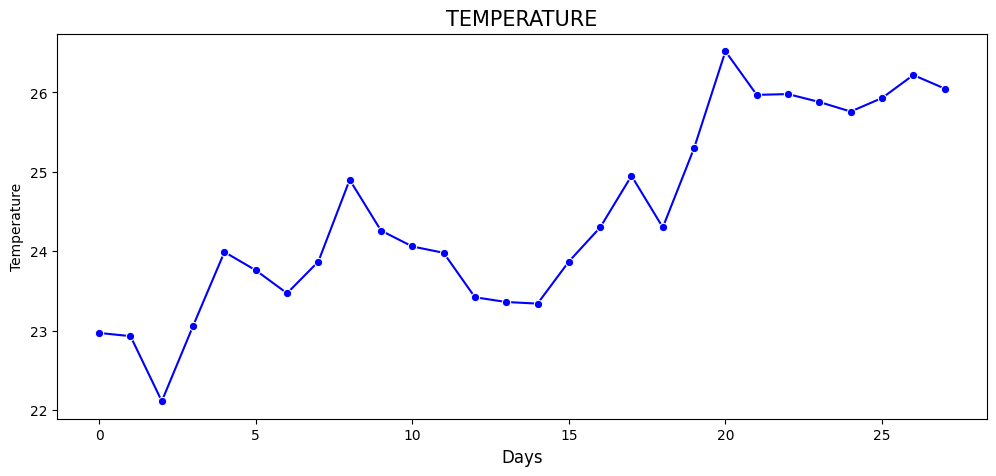

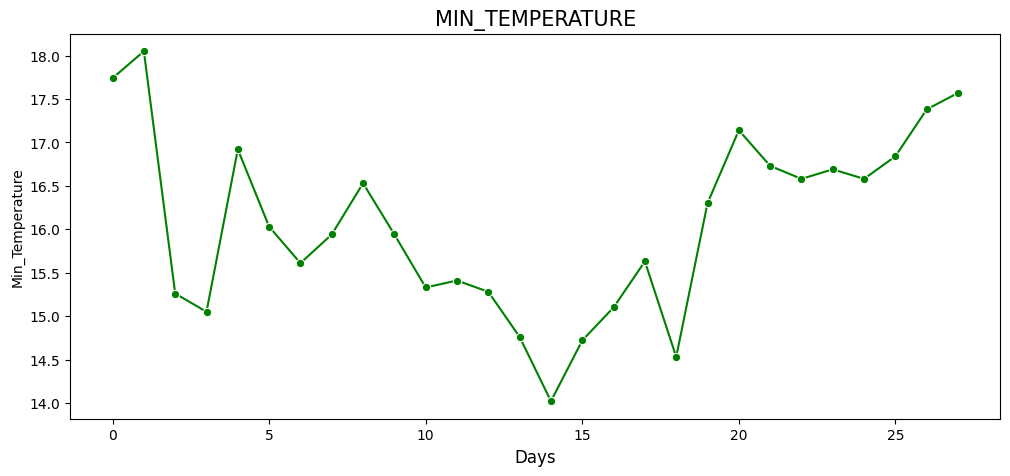

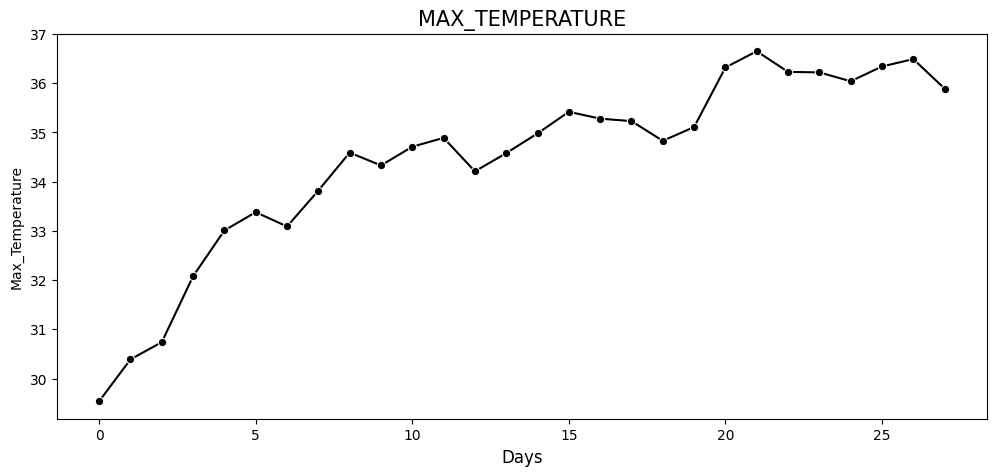

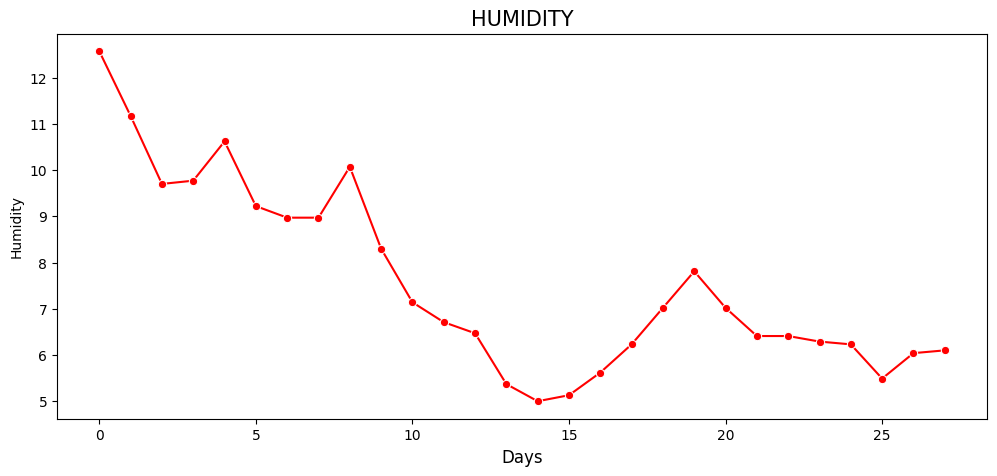

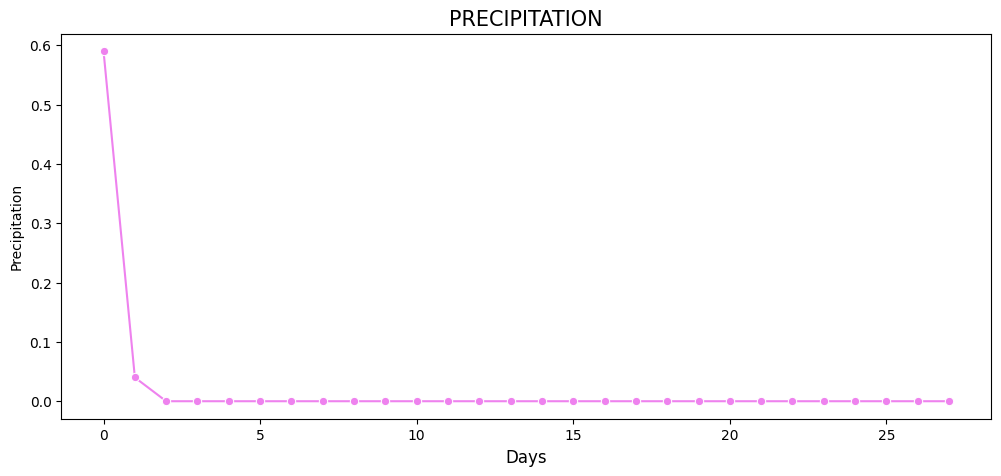

In [ ]:
# Plotting Weather Data
color={2:'blue',3:'green',4:'black',5:'red',6:'violet',7:'orange'}
for index in range(2,7):
    plt.figure(figsize=(12,5))
    plt.xlabel('Days', fontsize=12)
    plt.title('{}'.format(data.columns[index].upper()), fontsize=15)
    sns.lineplot(data=data.iloc[:,index], 
                 color=color[index], marker='o')
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


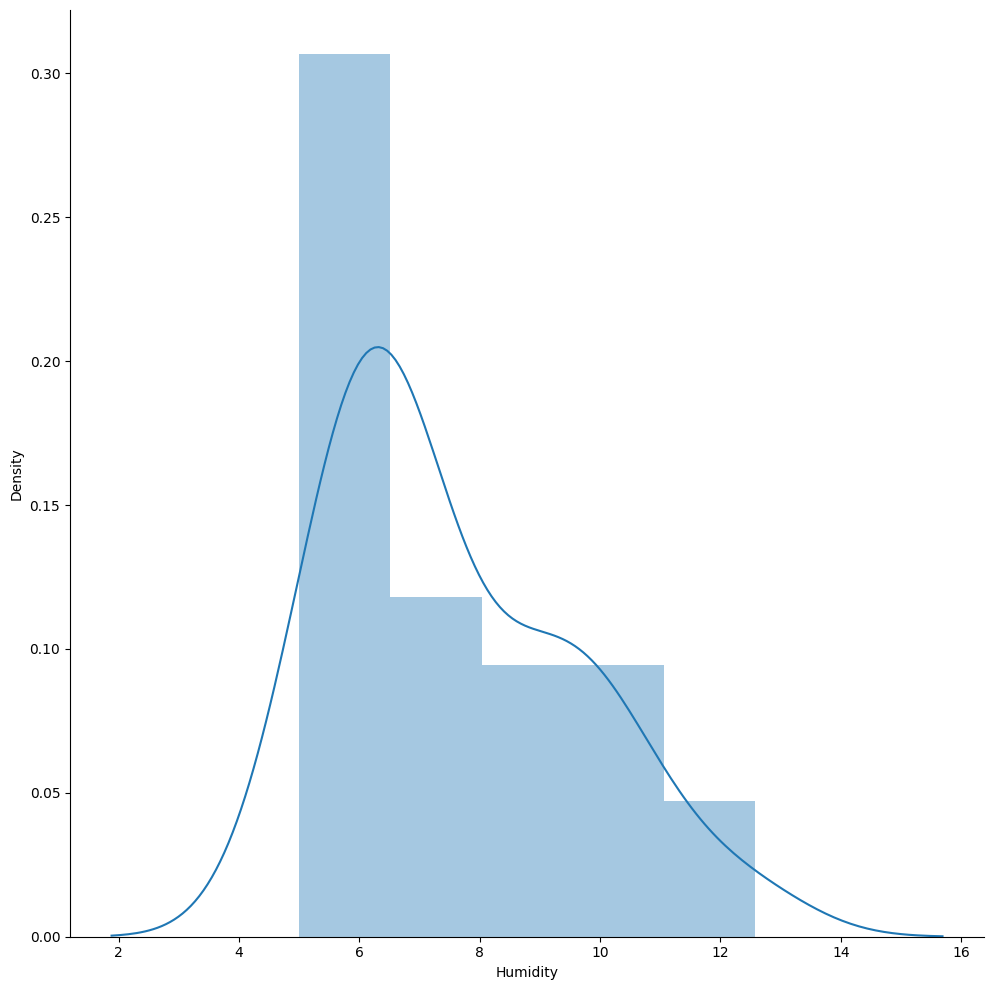

In [ ]:
# For Humidity
sns.FacetGrid(data, height=10).map(sns.distplot, "Humidity").add_legend()
plt.show()

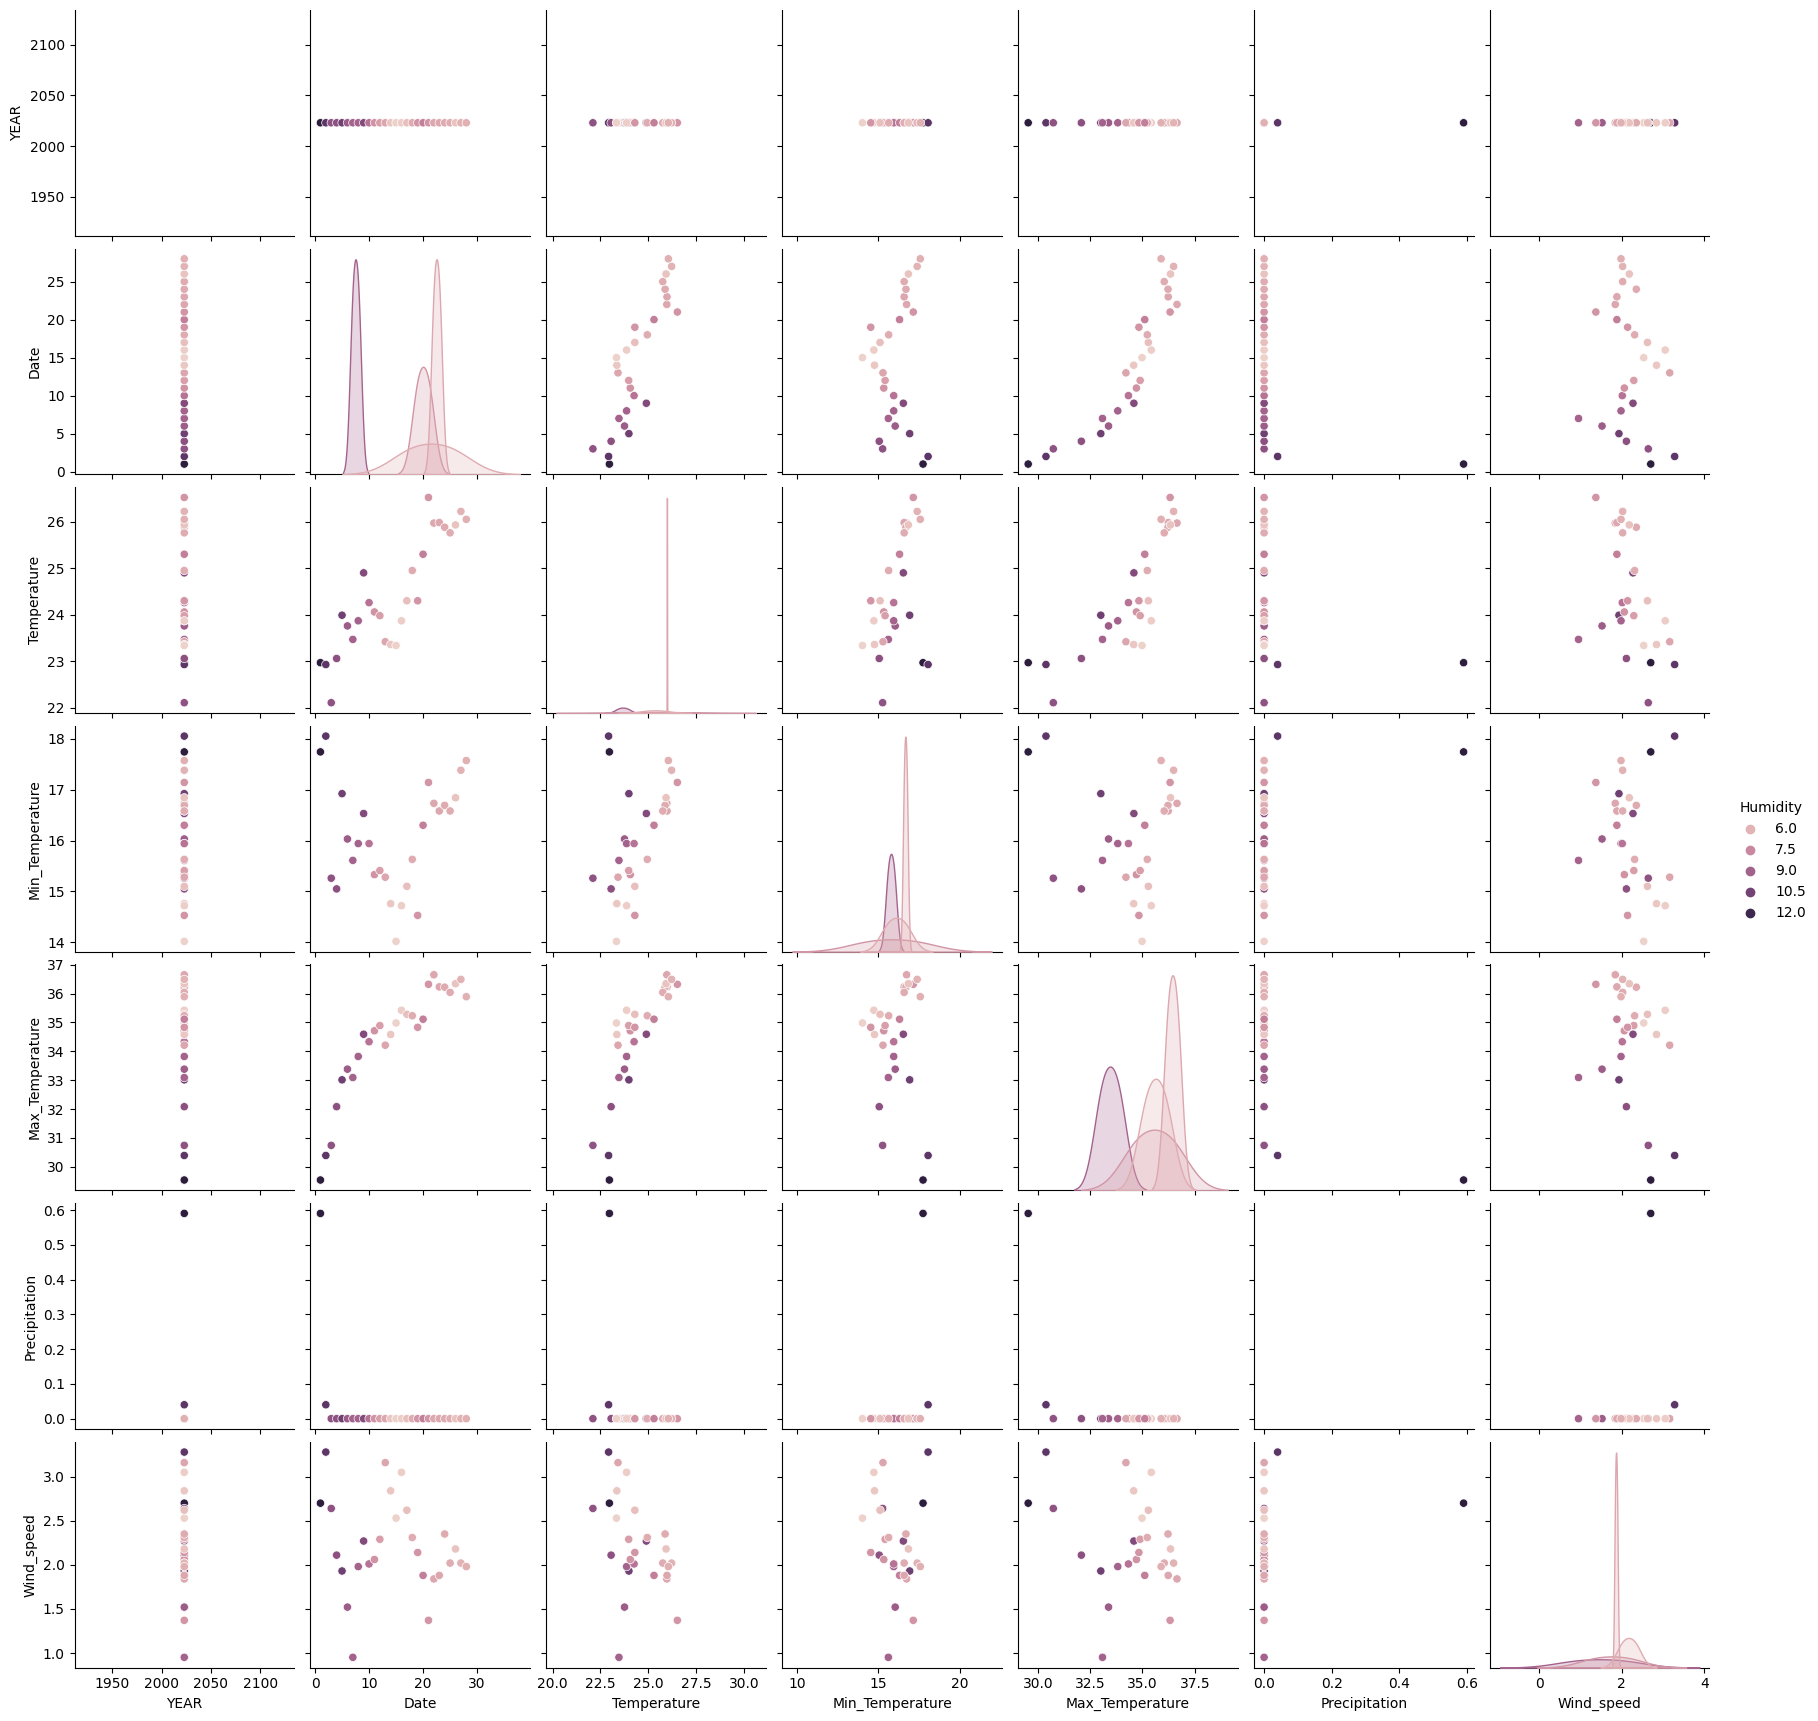

In [ ]:
sns.pairplot(data,hue="Humidity")

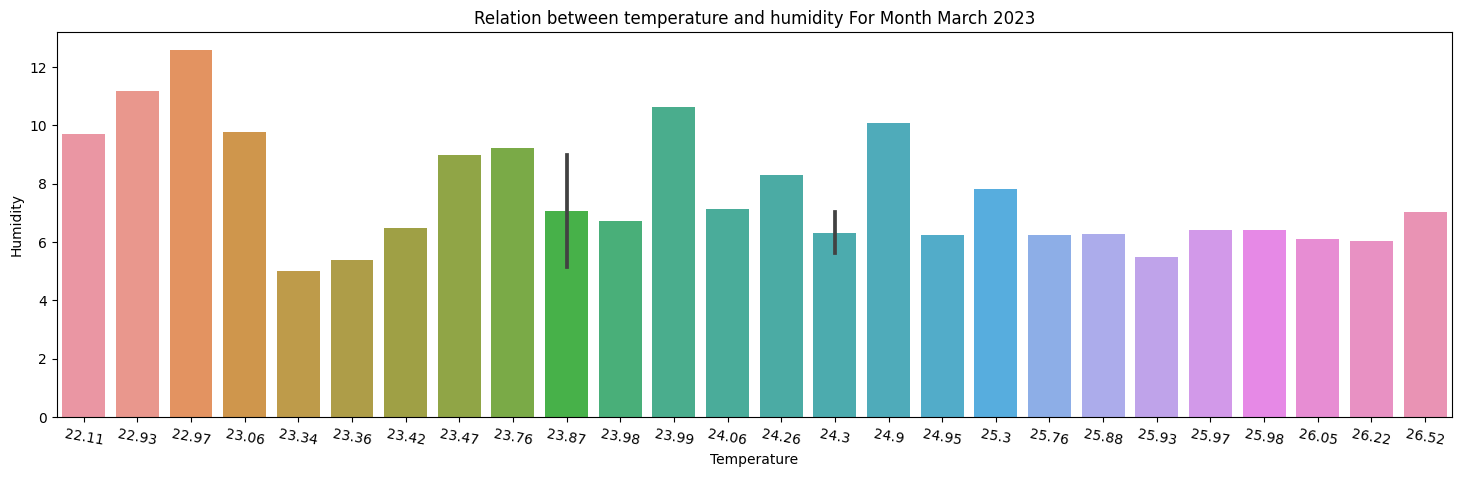

In [ ]:
plt.figure(figsize = (18,5))
sns.barplot(x='Temperature', y='Humidity',data=data)
plt.xticks(rotation=-10)
plt.title('Relation between temperature and humidity For Month March 2023')
plt.show()

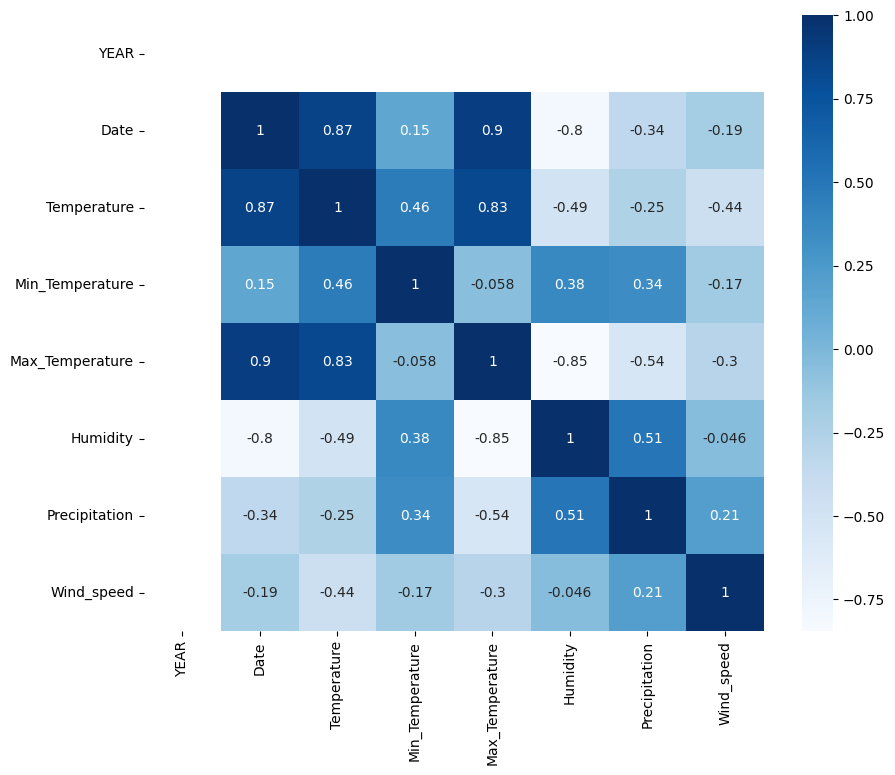

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data = data.corr(), annot = True, cmap = 'Blues')
plt.show()

**Humidity** (Create a pivot table to aggregate humidity by date & Heatmap Using Seaborn)

<Axes: ylabel='Date'>

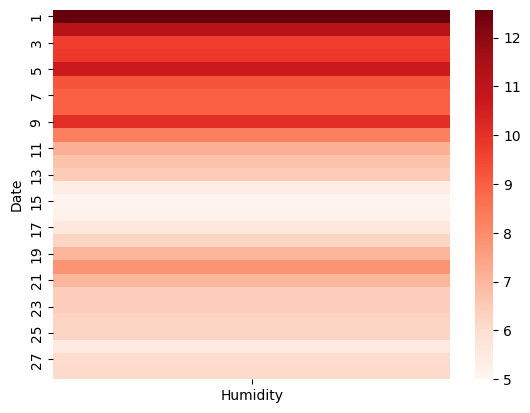

In [ ]:
humidity_table = pd.pivot_table(data, values='Humidity', index=['Date'])
sns.heatmap(data = humidity_table, cmap='Reds')

Temperature

<Axes: ylabel='Date'>

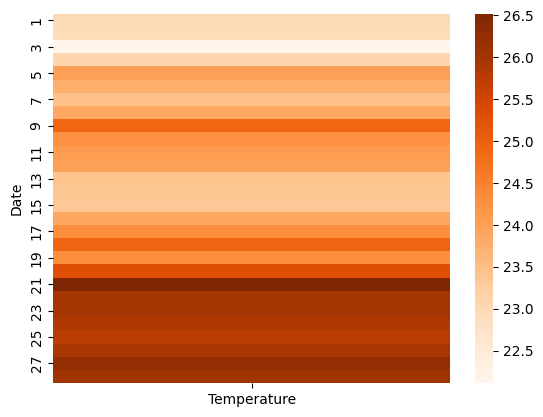

In [ ]:

Temperature_table = pd.pivot_table(data, values='Temperature', index=['Date'])
sns.heatmap(data = Temperature_table, cmap='Oranges')

In [ ]:
indices = ['Temperature', 'Humidity', 'Precipitation','Wind_speed']
ex_data = data.loc[:,indices]
ex_data

,Temperature,Humidity,Precipitation,Wind_speed
0,22.97,12.57,0.59,2.70
1,22.93,11.17,0.04,3.28
2,22.11,9.70,0.00,2.64
3,23.06,9.77,0.00,2.11
4,23.99,10.62,0.00,1.93
5,23.76,9.22,0.00,1.52
6,23.47,8.97,0.00,0.95
7,23.87,8.97,0.00,1.98
8,24.90,10.07,0.00,2.27
9,24.26,8.30,0.00,2.01


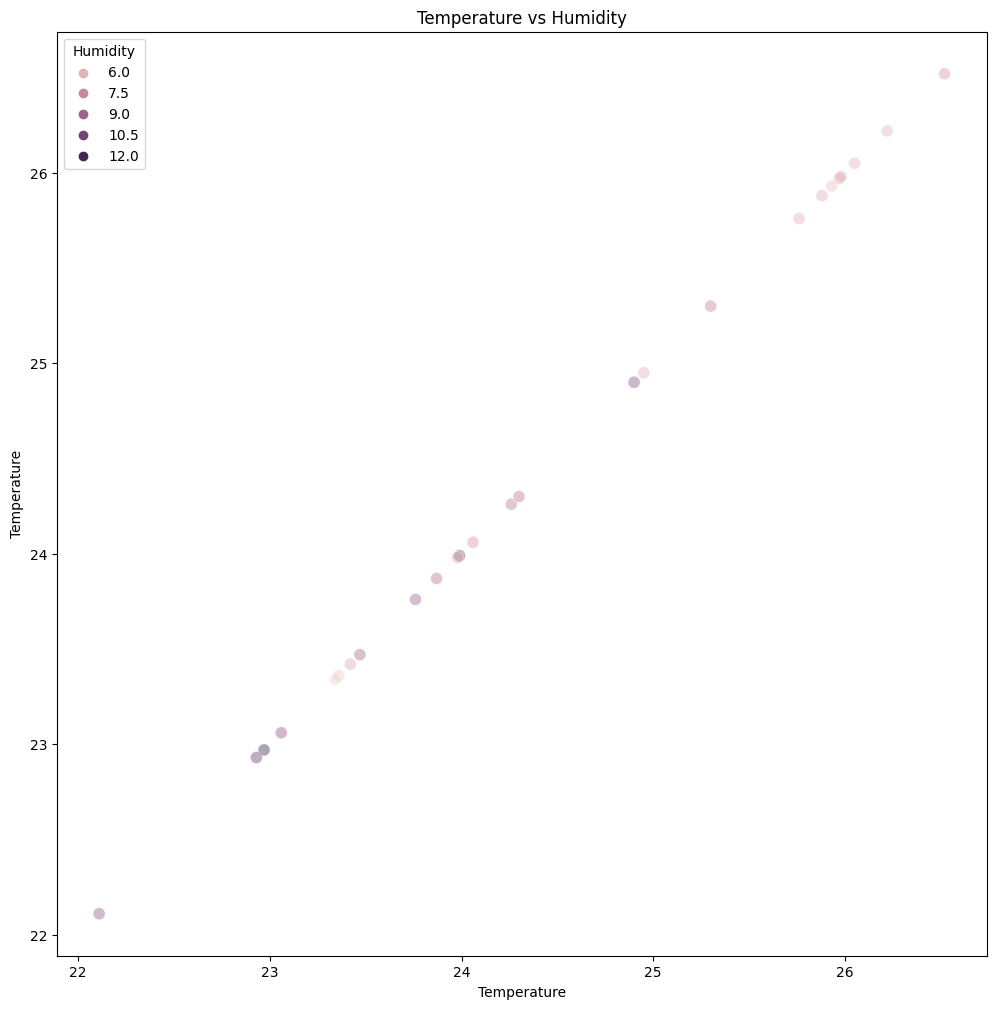

In [ ]:
#scatter plot for temperature and humidity by summary
plt.figure(figsize = (12,12))
plt.title('Temperature vs Humidity')
sns.scatterplot(x=ex_data.iloc[:,0], y=ex_data.iloc[:,0], hue= ex_data.iloc[:,1], s=75, alpha = 0.4)
plt.show()

DAYS-WISE ANALYSIS

In [ ]:
#Resampling the data days-wise by mean

indices = [2,3,4,5,6,7]
days = data.iloc[:,1] 

days.head()

0    1
1    2
2    3
3    4
4    5
Name: Date, dtype: int64

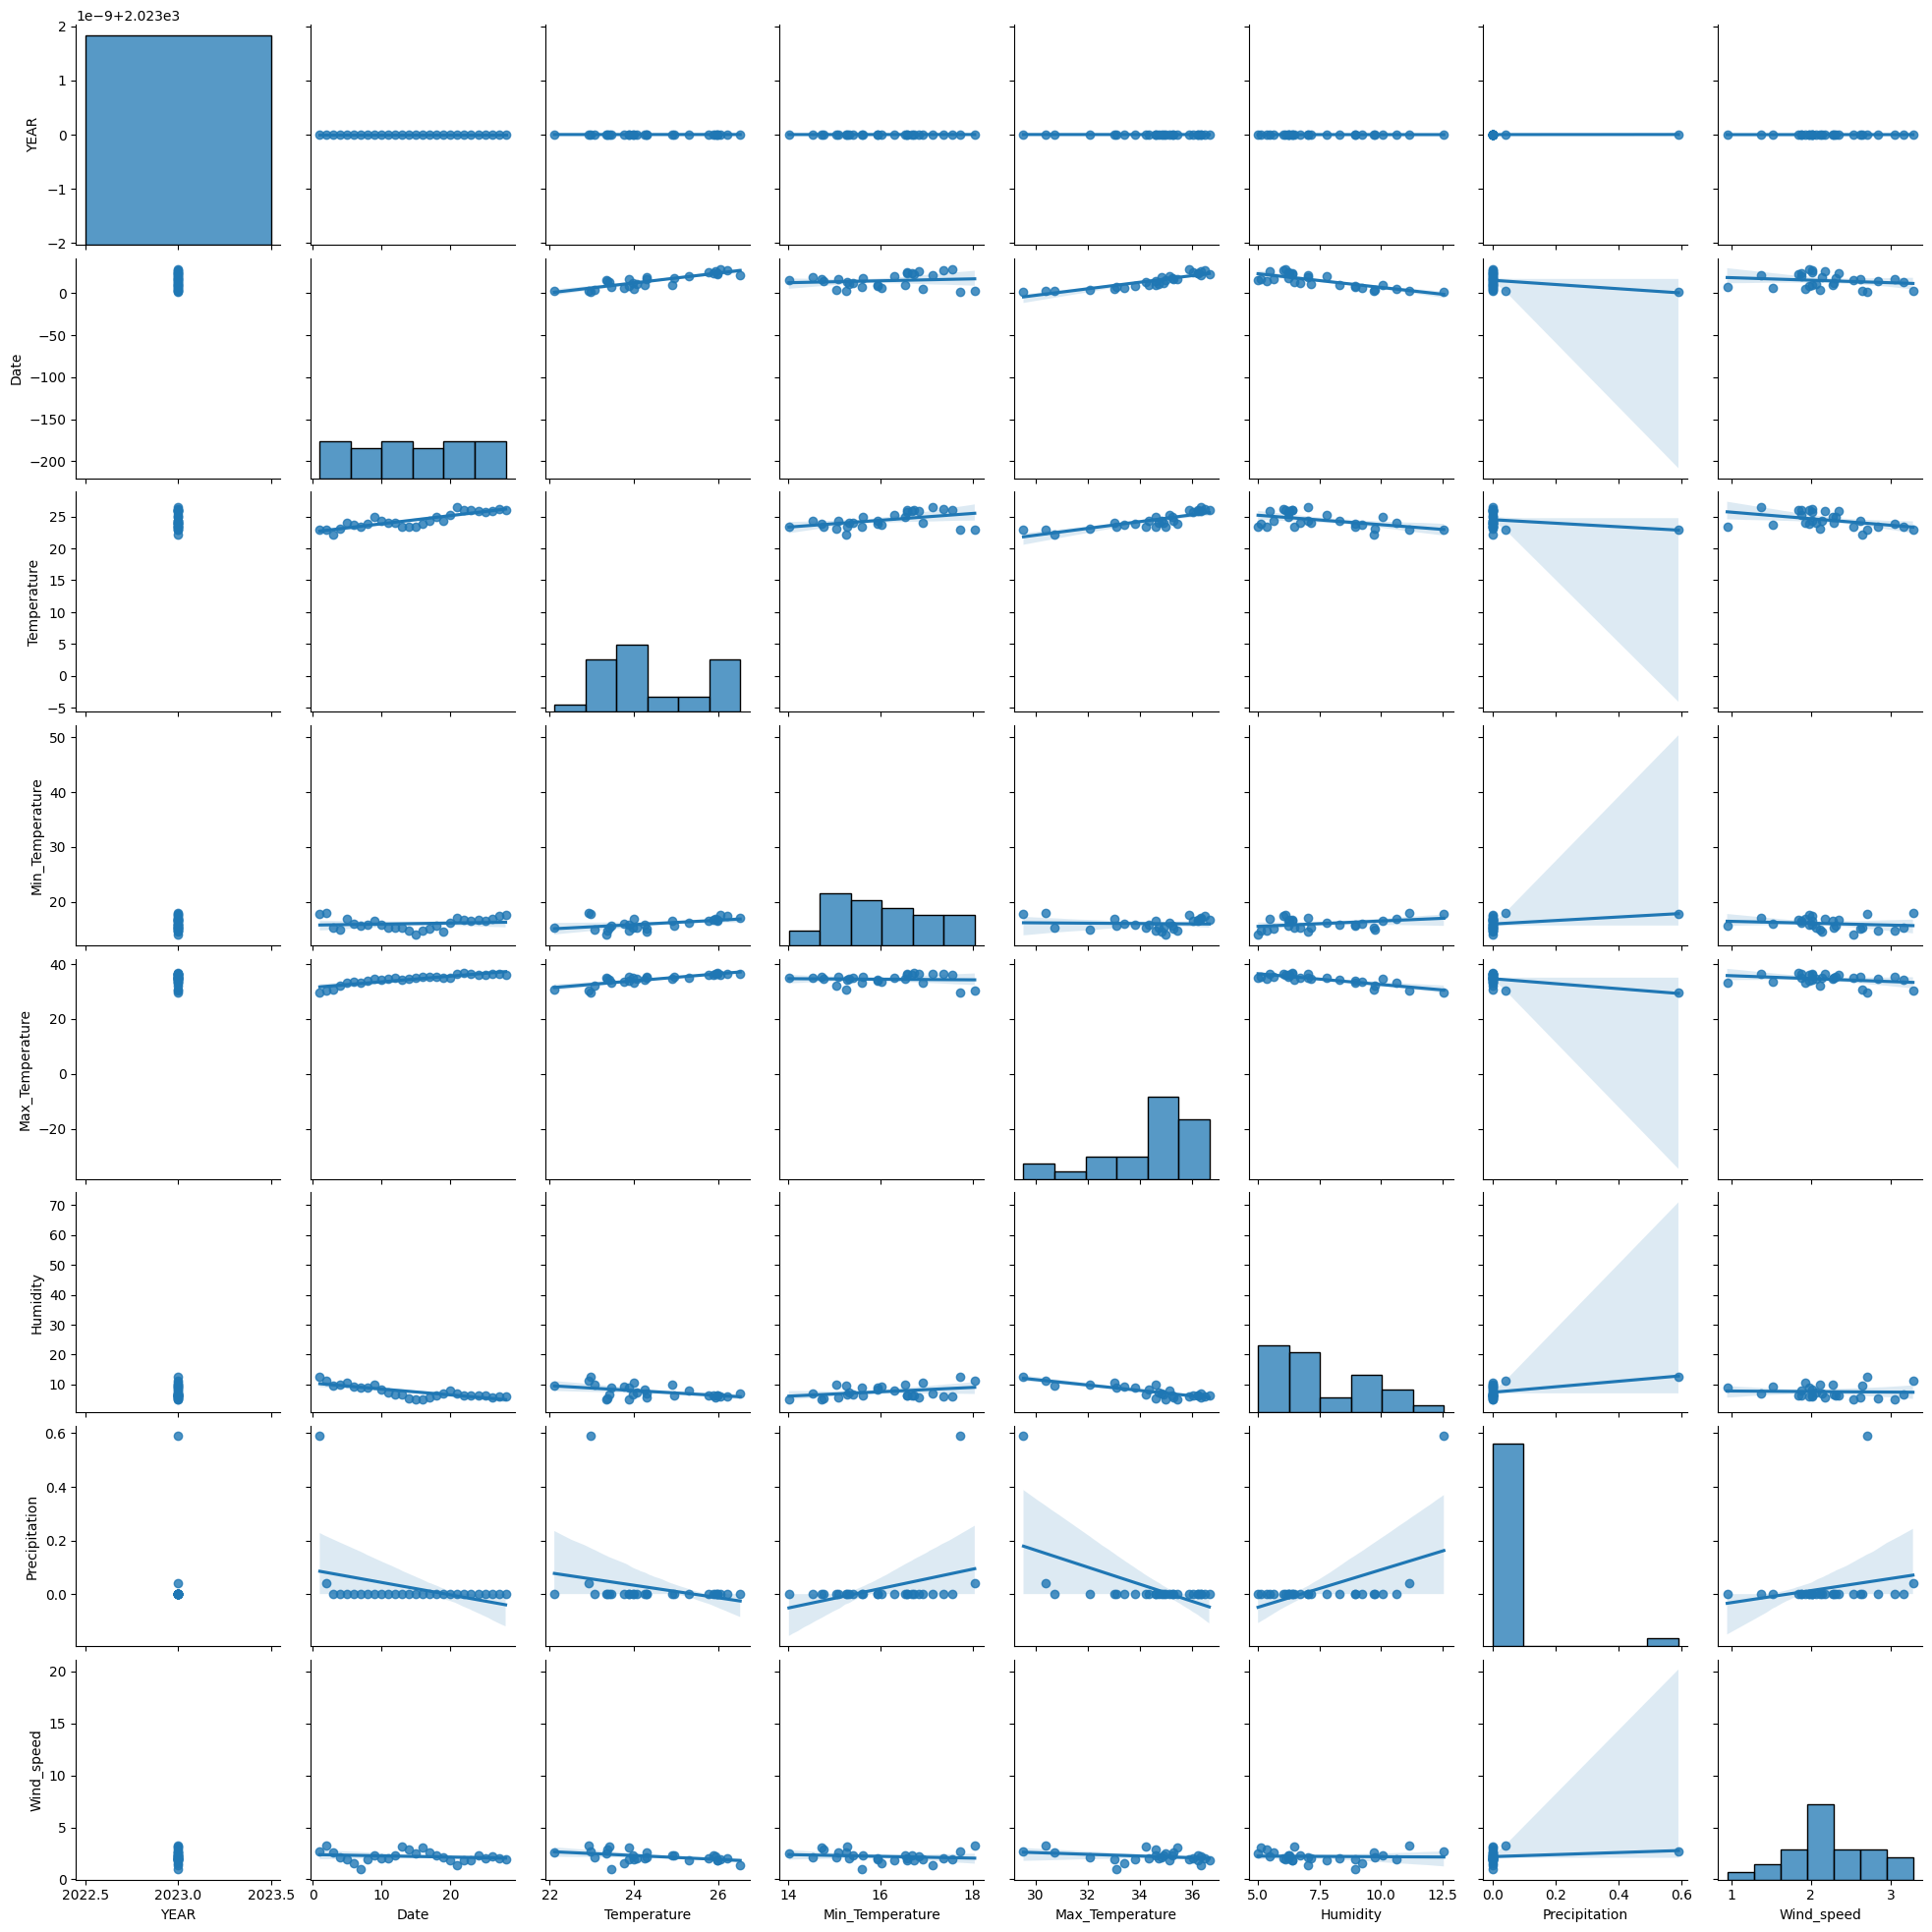

In [ ]:
# Pair plot for correlation
sns.pairplot(data, kind='reg')
plt.show()

In [ ]:
Temperature = data
normed_data = (Temperature  - Temperature.min()) / (Temperature.max() - Temperature.min())

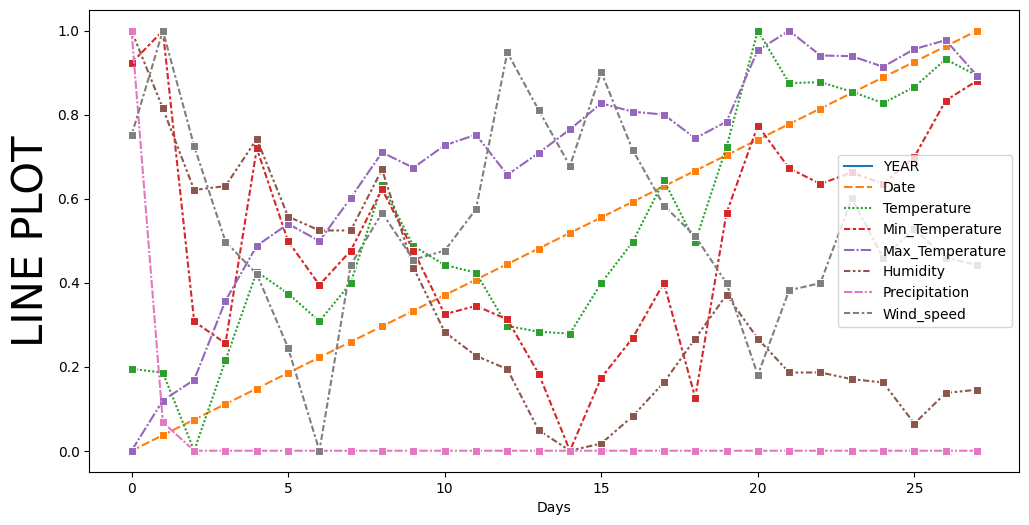

In [ ]:
#Line graph representation
plt.figure(figsize=(12,6))
plt.xlabel('Days')
plt.ylabel('LINE PLOT', fontsize=30)
sns.lineplot(data = normed_data, marker = 's')
plt.show()

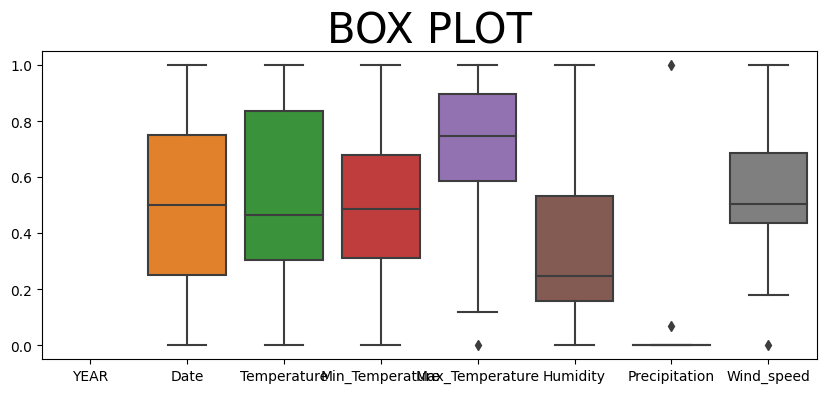

In [ ]:
#Box Plot
plt.figure(figsize = (10,4))
plt.title('BOX PLOT', fontsize=30)
sns.boxplot(data = normed_data)
plt.show()

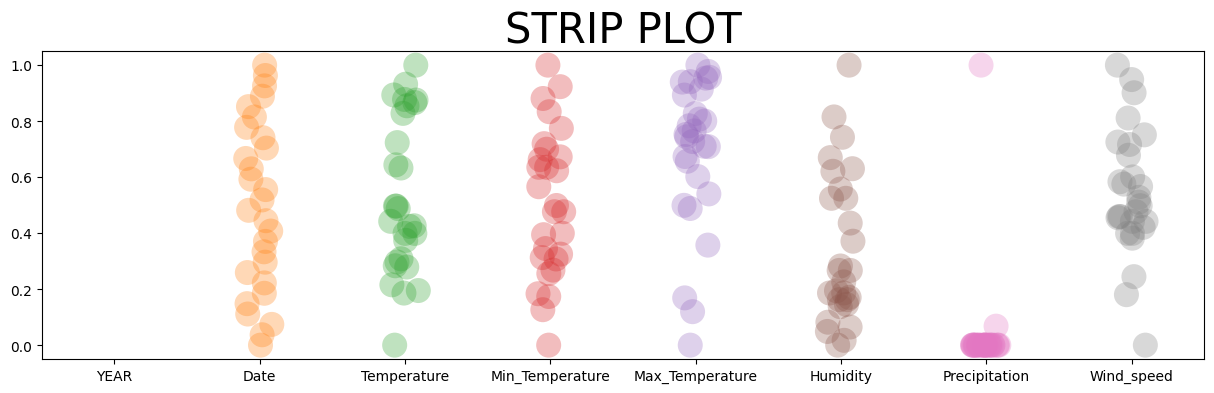

In [ ]:
#Strip Plot
plt.figure(figsize = (15,4))
plt.title('STRIP PLOT', fontsize=30)
sns.stripplot(data=normed_data, jitter= True, s =18, alpha = 0.3)
plt.show()